# FIFA WORLD CUP ANALYSIS

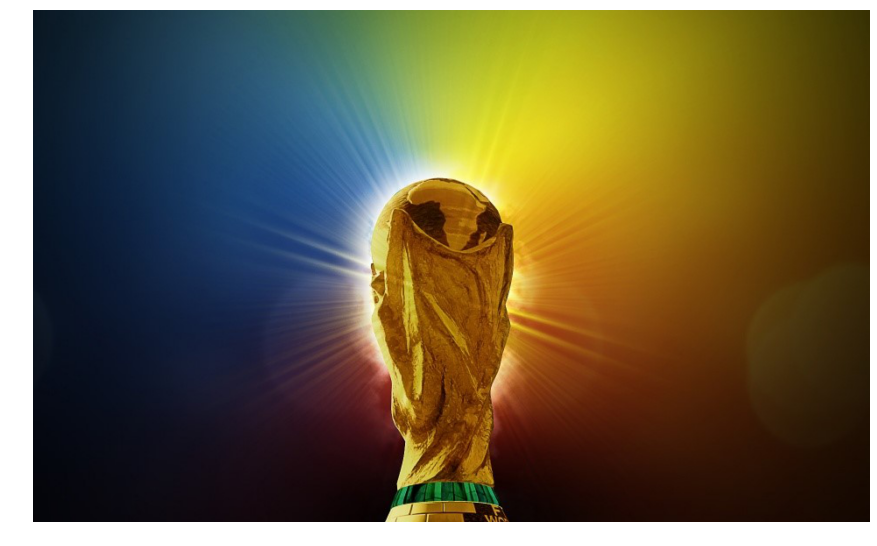

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline

plt.figure(figsize=(15,10))
img = np.array(Image.open(r"C:\Sushrut\Fifa world cup 2018\fifa_world_cup_2014-wallpaper.jpg"))
plt.imshow(img,interpolation="bilinear")
plt.axis("off")
plt.show()

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from os import path
from PIL import Image

# importing plotly modules
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

%matplotlib inline

In [3]:
world_cups = pd.read_csv('C:\Sushrut\Fifa world cup 2018\WorldCups.csv')
world_cup_player = pd.read_csv('C:\Sushrut\Fifa world cup 2018\WorldCupPlayers.csv')
world_cups_matches = pd.read_csv('C:\Sushrut\Fifa world cup 2018\WorldCupMatches.csv')

In [4]:
world_cup_player.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [5]:
world_cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.7
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [6]:
#Converting attendance column
world_cups['Attendance'] = world_cups['Attendance'].str.replace('.','').astype('int64')

In [7]:
world_cups.head(2)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363


## Number of Podium by Country

Text(0.5, 1.0, 'Number of podium by country')

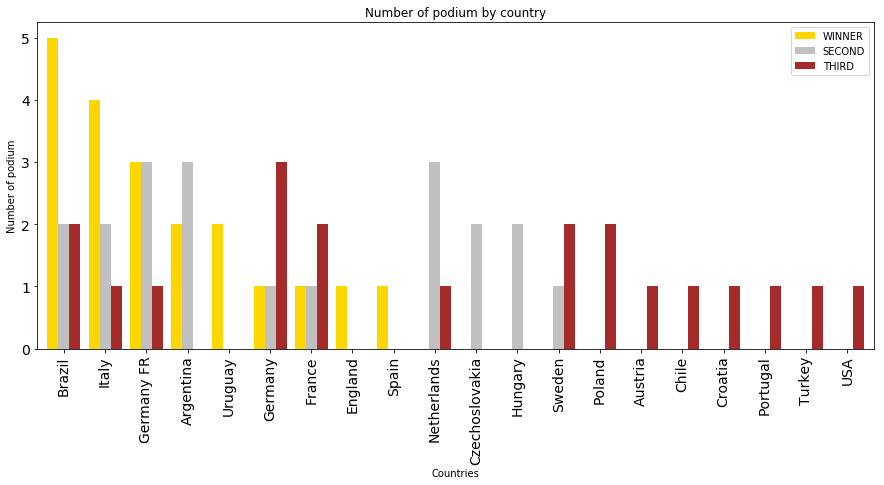

In [8]:
first = world_cups['Winner']
second = world_cups['Runners-Up']
third = world_cups['Third']

first_count = pd.DataFrame.from_dict(first.value_counts())
second_count = pd.DataFrame.from_dict(second.value_counts())
third_count = pd.DataFrame.from_dict(third.value_counts())
podium_count = first_count.join(second_count, how = 'outer').join(third_count, how = 'outer')
podium_count = podium_count.fillna(0)
podium_count.columns = ['WINNER', 'SECOND', 'THIRD']
podium_count = podium_count.astype('int64')
podium_count = podium_count.sort_values(by=['WINNER', 'SECOND', 'THIRD'], ascending=False)

podium_count.plot(y=['WINNER', 'SECOND', 'THIRD'], kind="bar", 
                  color =['gold','silver','brown'], figsize=(15, 6), fontsize=14,
                 width=0.8, align='center')
plt.xlabel('Countries')
plt.ylabel('Number of podium')
plt.title('Number of podium by country')

## Half-time goals scored (Top 10)

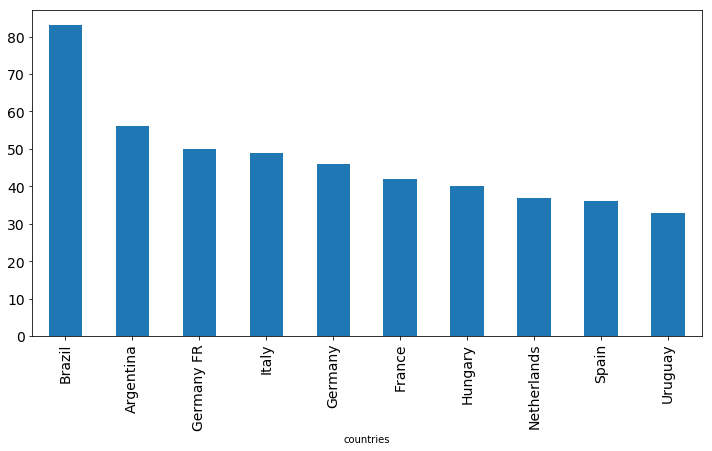

In [9]:
#Top 10 Half time goals scored by countries.
home = world_cups_matches[['Home Team Name', 'Half-time Home Goals']].dropna()
away = world_cups_matches[['Away Team Name', 'Half-time Away Goals']].dropna()

goals_per_country = pd.DataFrame(columns=['countries','half-time goals'])
goals_per_country = goals_per_country.append(home.rename(index=str,columns = {'Home Team Name': 'countries', 
                                                                               'Half-time Home Goals':'half-time goals'}))
goals_per_country = goals_per_country.append(away.rename(index=str, columns={'Away Team Name': 'countries',
                                                                               'Half-time Away Goals':'half-time goals'}))
goals_per_country['half-time goals'] = goals_per_country['half-time goals'].astype('int64')

goals_per_country = goals_per_country.groupby(['countries'])['half-time goals'].sum().sort_values(ascending=False)

goals_per_country[:10].plot(x=goals_per_country.index, y=goals_per_country.values, kind="bar", figsize = (12,6), fontsize=14)
plt.xlabel=('Countries')
plt.ylabel=('Number of Half time goals')
plt.title=('Top 10 countries who have the most half-time goals')

## Word Clouds

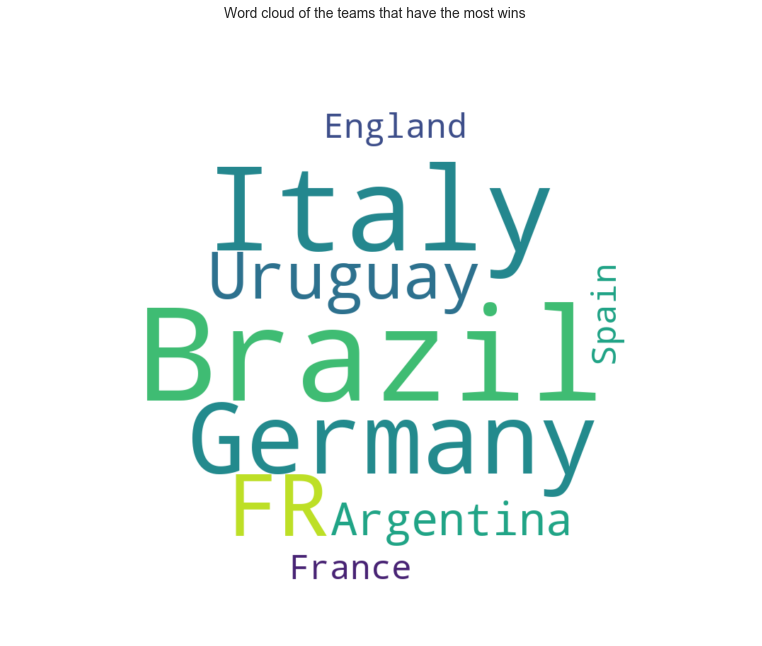

In [15]:
ftbl_img = np.array(Image.open("C:\Sushrut\Fifa world cup 2018\\football.jpg"))

ftbl_ball = WordCloud(background_color="white", max_words = 2000, mask=ftbl_img)
winner_text = ' '.join(world_cups['Winner'].dropna().tolist())
ftbl_ball.generate(winner_text)

plt.figure(figsize=(20,10))
sns.set_style("whitegrid")

plt.suptitle('Word cloud of the teams that have the most wins', fontsize=14)
plt.imshow(ftbl_ball, interpolation = 'bilinear')
plt.axis("off")
plt.show()

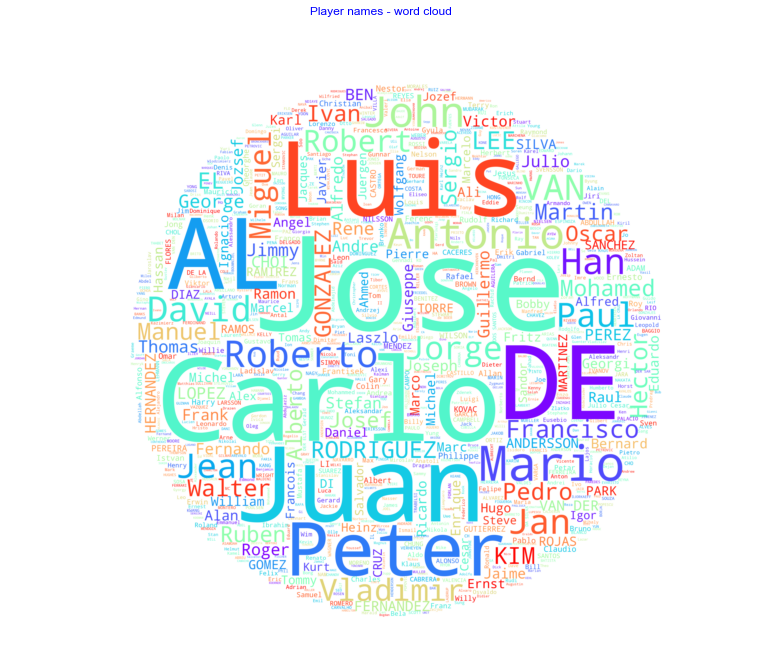

In [16]:
#WordCloud of Football player names

wrds = world_cup_player["Player Name"].value_counts().keys()

wc = WordCloud(background_color="white",scale=5,max_words=1000,colormap="rainbow", mask=ftbl_img).generate(" ".join(wrds))
plt.figure(figsize=(20,10))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.suptitle("Player names - word cloud",color='b')
plt.show()

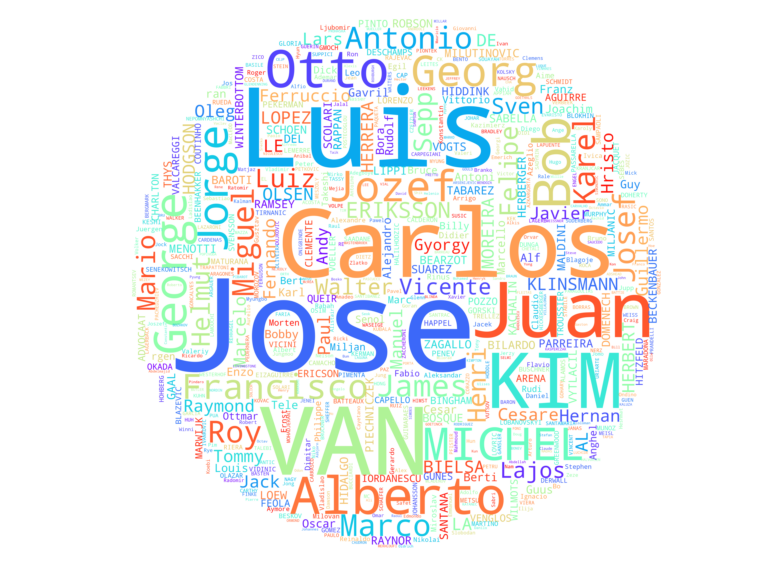

In [17]:
#WordCloud of names of Worldcup teams coaches

wrds1 = world_cup_player["Coach Name"].str.split("(").str[0].value_counts().keys()

wc = WordCloud(background_color="white",scale=5,max_words=1000,colormap="rainbow", mask=ftbl_img).generate(" ".join(wrds1))
plt.figure(figsize=(20,10))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
# plt.title("Player names - word cloud",color='b')
plt.show()

#      
# -------------------------------------------------------------------------------------------------------
